# Introduction to causality and DAGs

## Understanding key drivers
When tackling real-world engineering problems, a fundamental goal is to understand the underlying mechanisms that govern a system and the **key drivers** affecting its performance. This understanding often comes from conducting experiments, which are foundational to scientific research. For instance, if we aim to determine the effect of a new solar panel design on energy conversion efficiency, systematic experimentation might be the first approach. Through controlled manipulation and observation, experiments help us establish clear cause-and-effect relationships.

## Experimental vs. observational data
Ideally, we collect **experimental data** where variables of interest are manipulated to observe changes in outcomes directly. This direct manipulation helps in establishing causality with greater certainty. However, in many real-world settings, such as economics or public policy, performing experiments can be impractical, expensive, or unethical. As a result, researchers and analysts often rely on **observational data**, which is data collected without any direct manipulation of variables.

Working with observational data introduces complexities, particularly in distinguishing between mere correlations and actual causal relationships. Observational data can reveal patterns and associations, but without the ability to control for all influencing factors, these correlations might lead to misleading conclusions about causality.

**Causal inference** bridges this gap. It is a branch of statistics focused on determining cause-and-effect relationships from data where no explicit experimentation has been conducted. Unlike a mere correlation analysis, which only measures how variables move together, causal inference aims to uncover whether and how one variable influences another. This distinction is vital for informed decision-making across various domains, including economics, healthcare, and energy markets.

In the electricity market, understanding causal relationships is crucial. It enables stakeholders to predict the effects of policy changes, modify pricing strategies, and assess the impact of technological advancements on demand and supply dynamics. Causal inference provides the tools to make predictions about the consequences of potential actions, thereby supporting more strategic and effective decision-making.

## Correlation vs. causation: an example

The phrase "correlation does not imply causation" is frequently cited in statistical analysis to caution against the premature conclusion that one variable causes another simply because they are associated. Despite this, it is surprising how often business decisions are made based on perceived associations highlighted by correlation metrics alone.

To illustrate this point and introduce key terminology used in causal inference, consider a simple example involving three variables:
1. Temperature (°C)
2. Electricity load (MW)
3. Ice cream sales (GBP)

To better understand the relationships among these variables, we utilize a **causal graph**. In this scenario, we assume knowledge of the true causal structure of the data-generating process: temperature affects both electricity load and ice cream sales.

A causal graph is typically assumed to be a **directed acyclic graph (DAG)**, which is a graphical representation used to model and reason about the causal relationships between variables. In a DAG:

- **Nodes** represent variables or events.
- **Edges** (arrows) indicate causal influences from one variable to another.

When we say that the graph is **acyclic**, it means that it does not contain any loops, ensuring that causality flows in one direction and does not circle back on itself.

In the causal graph below, **temperature** is depicted as a parent node influencing two child nodes: **electricity load** and **ice cream sales**. This structure helps us visualize and understand that fluctuations in temperature are the underlying drivers for changes in electricity consumption and ice cream sales. Typically, we are also interested in understanding the **strength** of these causal connections. However, for now, let's not consider the specific impacts of these weights.

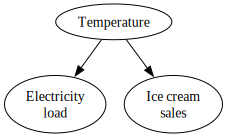

In [1]:
import graphviz
from IPython.display import display

# Create a new graph
dot = graphviz.Digraph()

# Add nodes
dot.node('T', 'Temperature')
dot.node('L', 'Electricity\nload')
dot.node('I', 'Ice cream\nsales')

# Add edges
dot.edge('T', 'L')
dot.edge('T', 'I')

# Display the graph in the notebook
display(dot)

Assume we have collected a dataset that follows the causal structure outlined in the previously discussed causal graph. However, let's also assume that we are unaware of this true causal structure and need to perform exploratory analysis to uncover potential correlations among the observations.

In this scenario, our goal is to explore the data, look for correlations, and attempt to infer possible causal relationships without prior knowledge of the underlying causal mechanisms. This approach mimics real-world situations where data scientists and researchers often work with complex datasets without a clear understanding of the dynamics that govern the relationships between variables.

Through statistical methods and visual analysis, we will examine the interactions between temperature, electricity load, and ice cream sales, exploring how these variables may be related and considering the implications of our findings.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating synthetic data
n = 100000
temperatures = np.random.normal(20, 5, n)  # average temperature in Celsius
electricity_load = 0.2 * (temperatures - 20)**2 + 70 + np.random.normal(0, 5, n)  # Quadratic relationship for U-shape
ice_cream_sales = 5* temperatures + np.random.normal(0, 20, n)  # also influenced by temperature

# Creating a DataFrame
data = pd.DataFrame({'Temperature': temperatures, 'Electricity Load': electricity_load, 'Ice Cream Sales': ice_cream_sales})

# Setting up the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Electricity Load with hexbin plot
hb1 = axes[0].hexbin(data['Temperature'], data['Electricity Load'], gridsize=50, cmap='Blues', bins='log')
axes[0].set_title('Temperature vs Electricity Load')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Electricity Load (MW)')

# Temperature vs Ice Cream Sales with hexbin plot
hb2 = axes[1].hexbin(data['Temperature'], data['Ice Cream Sales'], gridsize=50, cmap='Blues', bins='log')
axes[1].set_title('Temperature vs Ice Cream Sales')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Ice Cream Sales (GBP)')

# Electricity Load vs Ice Cream Sales with hexbin plot
hb3 = axes[2].hexbin(data['Electricity Load'], data['Ice Cream Sales'], gridsize=50, cmap='Blues', bins='log')
axes[2].set_title('Electricity Load vs Ice Cream Sales')
axes[2].set_xlabel('Electricity Load (MW)')
axes[2].set_ylabel('Ice Cream Sales (GBP)')

NameError: name 'np' is not defined

## Causal discovery from observational data

If our objective extends beyond merely studying correlations to understanding the underlying causal mechanisms within our data, we must delve into the field of causal discovery. Causal discovery techniques are designed to help uncover the actual causal relationships from observational data, even when the causal structure is not explicitly known. There are two main approaches to causal discovery: independence-based discovery and semi-parametric discovery.

### Independence-based causal discovery
The process involves analyzing basic DAG structures like **chains** and **forks** (to be discussed in a specific section) to interpret how variables influence each other. However, this method often only leads to identifying the **Markov equivalence class** of the graph. This means that while we can identify sets of relationships that are consistent with the observed independencies, we cannot definitively determine the direction of causality between all the variables. For instance, if we have only two variables, which are independent, this method cannot specify whether one causes the other or if they are causally unrelated.

### Semi-parametric causal discovery

Semi-parametric methods go a step further by making more specific **assumptions about the functional forms** of relationships between variables. These assumptions allow for a more detailed discovery of the causal graph, often identifying specific causal directions rather than just equivalence classes. By assuming certain **non-linearities** or **specific distributions of errors**, semi-parametric methods can exploit asymmetries in the data that reveal the direction of causal effects. This approach is more powerful in that it can often discern the actual causal structure rather than just a set of possible structures. However, the trade-off is that these methods require stronger assumptions about the nature of the data and the relationships involved, which may not always hold true.

In the upcoming chapters, after a brief overview of the basic causal structures, we will be focusing on semi-parametric causal discovery approaches {cite}`shimizu2022statistical`.